<a href="https://colab.research.google.com/github/ScumpikLau/ml-product-category-laura-corbu/blob/main/notebook/product_category_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and inspecting the dataset

- We will show a general view of our data, its structure and the data types

This will ensure the data is properly loaded and ready for further exploration

In [34]:
import pandas as pd

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/ScumpikLau/ml-product-category-laura-corbu/main/data/IMLP4_TASK_03-products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)
# Show first few rows
print("First five rows:")
display(df.head())
# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)
First five rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## Checking for missing values

- we will count for missing (NaN)values per column
- visualize missing values using a heatmap

In [35]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


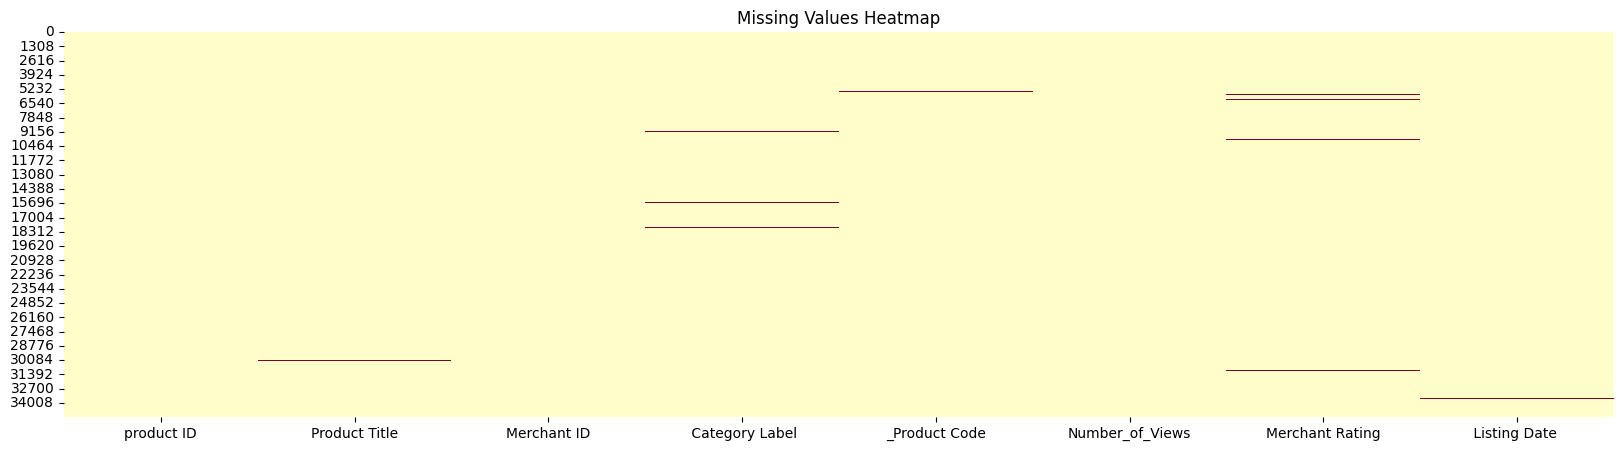

In [36]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

## Category Analysis

- checking how many products we have for each Category Label
- plot category distribution

In [37]:
# Count ocurrences of each Category Label
category_counts = df[' Category Label'].value_counts()

# Print counts
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64


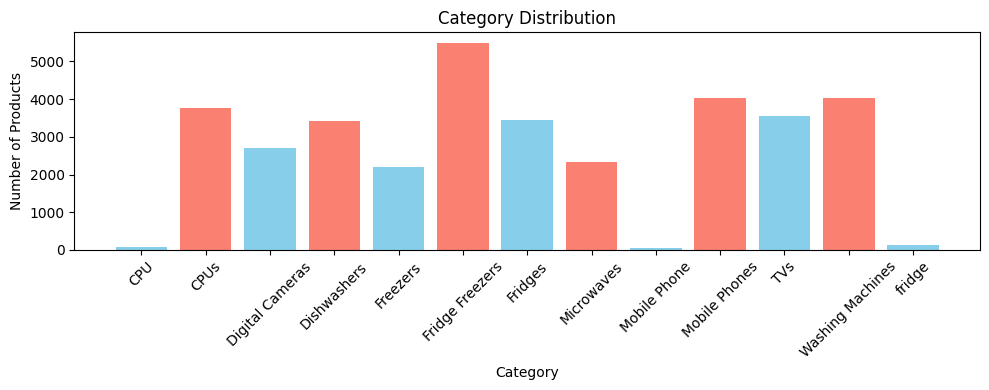

In [38]:
# Transform ' Category Label' column to category in order to plot the distribution
cats = df[' Category Label'].astype('category').cat.categories  # reading categories in order
category_counts = df[' Category Label'].value_counts().reindex(cats, fill_value=0) # reorder rows in the 'cats' order, replacing NaN with 0

# Plot category distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.bar(category_counts.index, category_counts.values, color=['skyblue', 'salmon'])
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Removing missing values

- in order to continue to work with the data we must resolve the missing values

In [39]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64


## Standardizing the ' Category Label' column

- we are going to eliminate the space in the columns name and concentrate the categories

In [40]:

patterns = {
    r'^cpu(s)?$':                 'CPUs',
    r'^digital cameras?$':        'Digital Cameras',
    r'^dishwashers?$':            'Dishwashers',
    r'^freezers?$':               'Freezers',
    r'^fridge freezers?$':        'Fridge Freezers',
    r'^fridges?$':                'Fridges',
    r'^microwaves?$':             'Microwaves',
    r'^mobile phones?$':          'Mobile Phones',
    r'^tvs?$':                    'TVs',
    r'^washing machines?$':       'Washing Machines',
}

df = df.copy()  # working on an independent copy, not a view
df.columns = df.columns.str.strip()  # remove space in column name

df.loc[:, 'category'] = (       # all rows, one column
    df['Category Label']        # column without space
      .str.strip().str.lower()
      .replace(patterns, regex=True)
)

print("New category column:")
print(df['category'].value_counts())


New category column:
category
Fridge Freezers     5424
Mobile Phones       4023
Washing Machines    3971
CPUs                3792
Fridges             3524
TVs                 3502
Dishwashers         3374
Digital Cameras     2661
Microwaves          2307
Freezers            2182
Name: count, dtype: int64


## Changing the 'Listing Date' column to DateTime

In [41]:
df['Listing Date'] = pd.to_datetime(df['Listing Date'], errors='coerce')
print(df['Listing Date'].dtype)

datetime64[ns]


## Exploring feature engineering on the 'Product Title' column

- first we are going to measure the number of words and characters in title, the presence of numbers or special characters, the length of the longest word and if the title contains brands name
- then we are going to visualize if this affects the category classification of products

In [50]:
df['Product Title']=df['Product Title'].astype(str)
# number of characters
df['title_char_count'] = df['Product Title'].str.len()
display(df['title_char_count'])

# Group by category and describe title  length
print("Title character length statistics by category:")
print(df.groupby('category', observed=False)['title_char_count'].describe())

# number of words
df['title_word_count'] = df['Product Title'].str.split().str.len()

# presence of numbers
df['title_has_numbers'] = df['Product Title'].str.contains(r'\d')

# presence of special characters
df['title_special_char'] = df['Product Title'].str.contains(r'[^A-Za-z0-9\s]')
display(df['title_special_char'])

# check for brands
brands = ['apple', 'sony', 'doro', 'samsung', 'motorola', 'maxcom', 'xiaomi', 'alcatel', 'wileyfox', 'htc', 'google',
          'nokia', 'emporia', 'blackview', 'beafon', 'asus', 'swisstone', 'wiko', 'lg', 'panasonic','philips', 'loewe','intel',
          'hewlett packard', 'canon']
pattern = r'(?<!\w)(' + '|'.join(brands) + r')(?!\w)'

df['brand_found'] = df['Product Title'].str.extract(pattern)
df['title_has_brand'] = df['brand_found'].notna()
display(df['title_has_brand'])

# longest word length
df['title_longest_word_len'] = (
    df['Product Title'].str.findall(r'\w+').apply(lambda lst: max(map(len, lst)) if lst else 0)
)

,title_char_count
0,31
1,35
2,70
3,35
4,54
...,...
35306,69
35307,66
35308,67
35309,46


                   count       mean        std   min   25%   50%   75%    max
category                                                                     
CPUs              3792.0  67.016350  20.259078  11.0  55.0  65.0  76.0  190.0
Digital Cameras   2661.0  50.118001  24.512564   6.0  34.0  44.0  61.0  180.0
Dishwashers       3374.0  50.184351  17.939197  10.0  39.0  51.0  61.0  192.0
Freezers          2182.0  48.705775  18.132038  10.0  37.0  47.0  60.0  168.0
Fridge Freezers   5424.0  55.266777  20.467733   9.0  42.0  54.0  68.0  170.0
Fridges           3524.0  48.495743  18.344180   8.0  36.0  46.0  62.0  173.0
Microwaves        2307.0  51.788903  18.850512  11.0  39.0  52.0  65.0  164.0
Mobile Phones     4023.0  46.155108  30.651590   5.0  26.0  40.0  57.0  200.0
TVs               3502.0  54.741576  23.339558   6.0  40.0  53.0  65.0  195.0
Washing Machines  3971.0  53.057416  18.867541  10.0  42.0  54.0  65.0  149.0


,title_special_char
0,False
1,False
2,True
3,False
4,True
...,...
35306,False
35307,False
35308,False
35309,False


,title_has_brand
0,True
1,True
2,True
3,True
4,True
...,...
35306,False
35307,False
35308,False
35309,False


## Plot to ilustrate the connection between the number of words in title and the products category

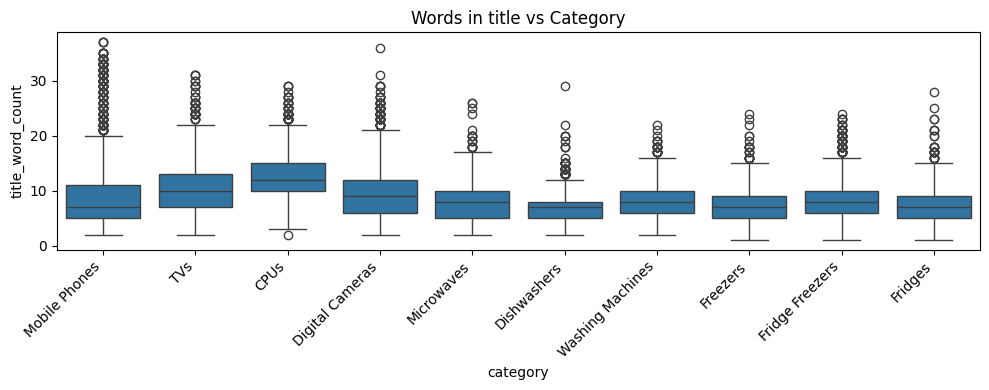

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='category', y='title_word_count')
plt.xticks(rotation=45, ha='right')
plt.title('Words in title vs Category')
plt.tight_layout()
plt.show()

## Plot to ilustrate if the longest word length in title affects category

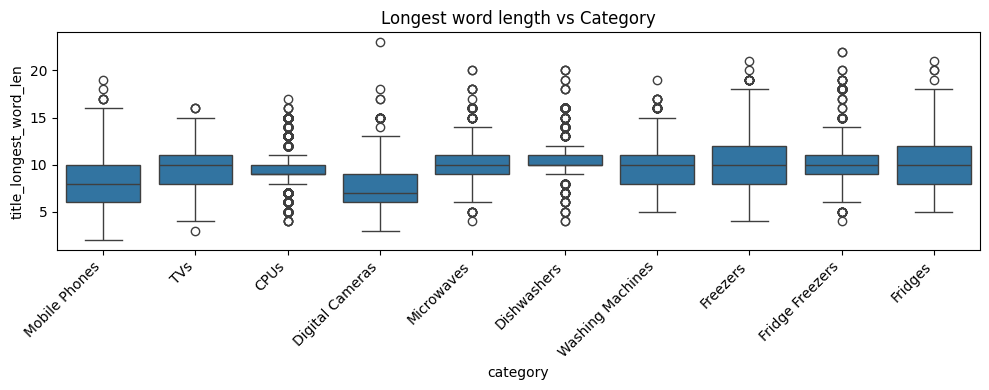

In [44]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='category', y='title_longest_word_len')
plt.xticks(rotation=45, ha='right')
plt.title('Longest word length vs Category')
plt.tight_layout()
plt.show()

## Plot to ilustrate the proportion of categories with numbers in title

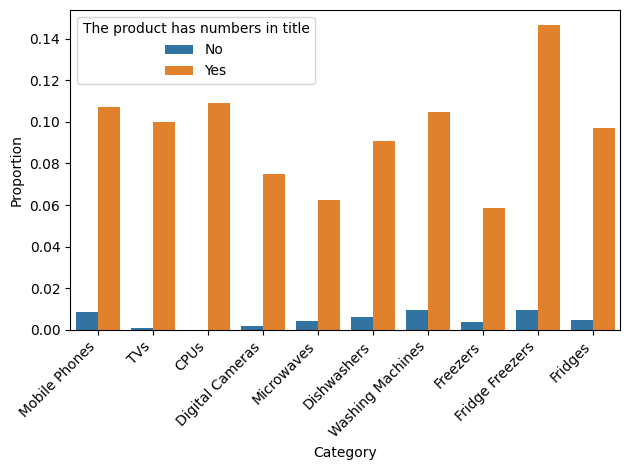

In [45]:
ax = sns.countplot(data=df, x='category', hue='title_has_numbers',
                   stat='proportion')
ax.set_ylabel('Proportion')
ax.set_xlabel('Category')
plt.xticks(rotation=45, ha='right')
ax.legend(title='The product has numbers in title', labels=['No','Yes'])
plt.tight_layout()
plt.show()

## Trying to establish if the Number of Views and the Listing Date affects the category of the product

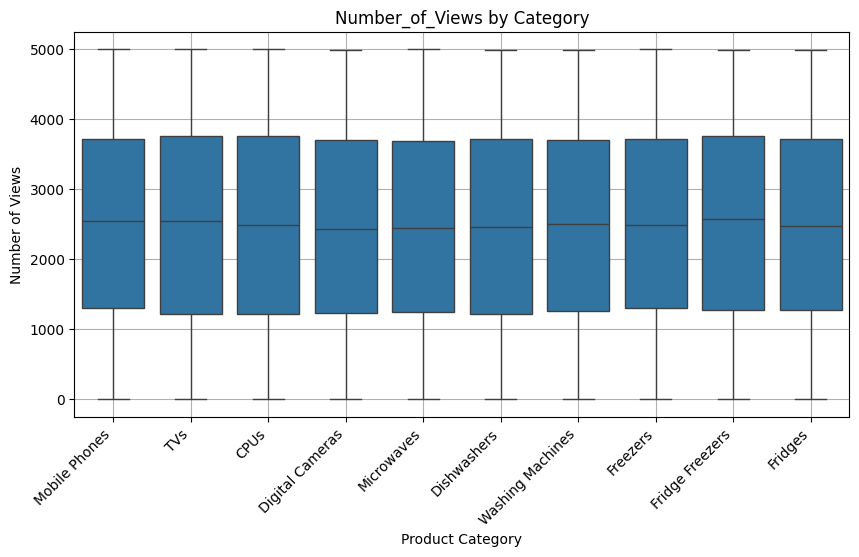

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='category', y='Number_of_Views')
plt.xticks(rotation=45, ha='right')
plt.title('Number_of_Views by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Views')
plt.grid(True)
plt.show()


## Creating a plot to show the evolution of categories by the Listing Date

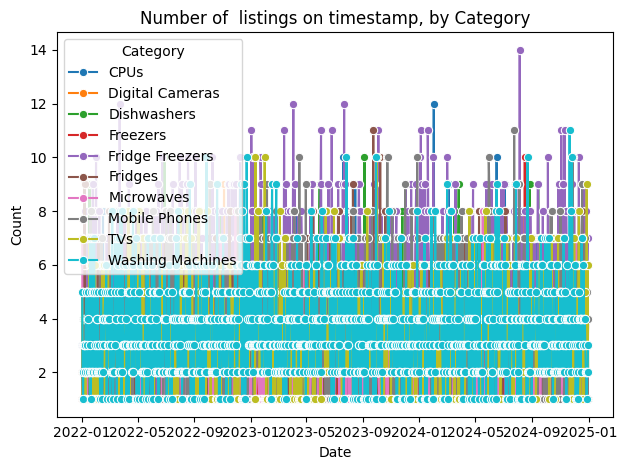

In [47]:
counts = (df.groupby(['Listing Date','category'])
            .size()
            .reset_index(name='count'))

sns.lineplot(data=counts, x='Listing Date', y='count', hue='category', marker='o')
plt.title('Number of  listings on timestamp, by Category')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Category',loc='upper left')
plt.tight_layout()
plt.show()

## From the analysis so far it is clear that the features that can mostly affect category distribution are the Product Title and the Title's Longest Word Length.
 Let's check also if the number of characters in title also affect category

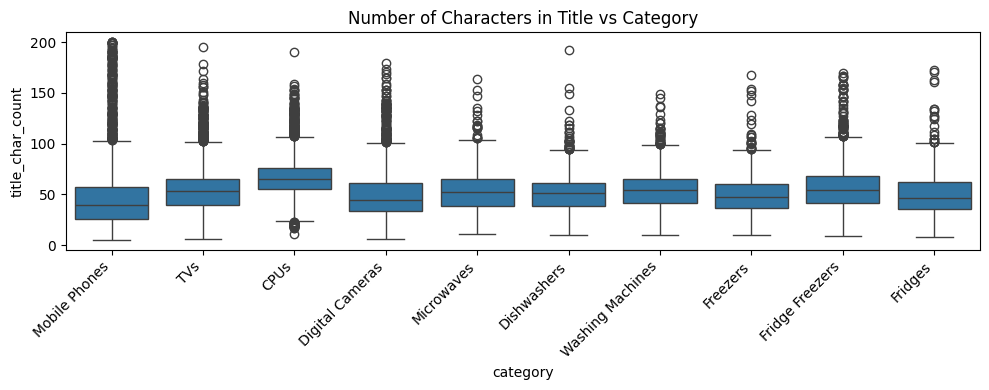

In [48]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='category', y='title_char_count')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Characters in Title vs Category')
plt.tight_layout()
plt.show()

## Removing irrelevant column
 We will remove columns that are not useful for model training:
 - 'product ID'

 - 'Merchant ID'

 - '_Product Code'

 - 'Number_of_Views'

 - 'Merchant Rating'

 - 'Listing Date'

 The key features we want to keep are:
 -  'Product Title', 'Category Label', 'category' - the target variable

 - the new features: 'title_char_count' and 'title_longest_word_len'


In [49]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'])

# Preview remaining columns
print("\nRemaining columns:")
print(df.columns.tolist())


Remaining columns:
['Product Title', 'Category Label', 'category', 'title_char_count', 'title_word_count', 'title_has_numbers', 'title_special_char', 'brand_found', 'title_has_brand', 'title_longest_word_len']
